# Project 3: Web APIs and NLP <br>

#### Brandie Hatch

### Exploratory Data Analysis, Cleaning, and Feature Engineering

## Problem



Learn with Chewie presents:
Web API and NLP Services

Service dogs require a lot of training. What are the classification opportunities between the subreddits for Service Dogs and Dog Training? How can those classifications help to predict training opportunities for service and other dogs?

__Data Dictionary__

Features used listed below:
| **Feature**      | **Type** | **Dataset** | **Description**                                           |
|------------------|----------|-------------|-----------------------------------------------------------|
| **subreddit**    | _object_ | df          | Subreddit Name (instance of Subreddit)                    |
| **title**        | _object_ | df          | Title of submission                                       |
| **selftext**     | _object_ | df          | Selftext of a submission (an empty string if a link post) |
| **author**       | _object_ | df          | Author (Redditor) of the submission                       |
| **name**         | _object_ | df          | Full ID of submission, prefixed with t4_                  |
| **score**        | _int64_  | df          | Total points for a submission                             |
| **num_comments** | _int64_  | df          | Number of comments on the submission                      |

Created with: https://www.tablesgenerator.com/markdown_tables#                                                             

## Imports, Reading in Data, and Cleaning Data

Cleaning data will be in response to some basic EDA to create a single DataFrame that can be used for more detailed EDA to determine modeling.

In [1]:
# python library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline
pd.options.display.max_columns =999

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re


c:\Users\hatch\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


### Dog Training

In [5]:
# load data
dogtraining = pd.read_csv('../data/dogtraining.csv')
print(dogtraining.shape)
dogtraining.head(1)

(4730, 9)


,author,created_utc,id,num_comments,over_18,score,selftext,subreddit,title
0,Kittehmilk,1652830488,urzhj4,2,False,1,The wife and I adopted a 1 to 3 year old beagl...,Dogtraining,Rescue dog will not come inside from fenced in...


In [ ]:
# remove columns that will not be needed for next steps
#dogtraining = dogtraining.drop(columns=['all_awardings', 'allow_live_comments', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_text', 'author_flair_type', 'author_fullname', 'author_is_blocked', 'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post', 'contest_mode', 'domain', 'full_link', 'gildings', 'is_created_from_ads_ui', 'is_crosspostable', 'is_meta', 'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video', 'link_flair_background_color', 'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id', 'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked', 'media_only', 'no_follow', 'num_crossposts', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls', 'retrieved_on', 'send_replies', 'spoiler', 'stickied', 'subreddit_id', 'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'total_awards_received', 'treatment_tags', 'upvote_ratio', 'url', 'whitelist_status', 'wls', 'author_cakeday', 'call_to_action', 'category', 'edited'])

In [7]:
print(dogtraining.shape)
dogtraining.head()

(4730, 9)


,author,created_utc,id,num_comments,over_18,score,selftext,subreddit,title
0,Kittehmilk,1652830488,urzhj4,2,False,1,The wife and I adopted a 1 to 3 year old beagl...,Dogtraining,Rescue dog will not come inside from fenced in...
1,Technical_Stop_5303,1652829344,urz4ed,1,False,1,I have an 8 month old Rottweiler puppy who is ...,Dogtraining,“Drop it” fails
2,nothanks_00,1652827869,urymth,1,False,1,Long story short we used to have two dogs. A d...,Dogtraining,My dog will ONLY submissive pee.
3,packagefortonystank,1652827039,urycyf,1,False,1,I’ve recently adopted a golden retriever! He’s...,Dogtraining,Separation anxiety in dog used to living in a ...
4,ArcherIsLive,1652826968,uryc2e,1,False,1,**TLDR:** Do you leave your dog unsupervised ...,Dogtraining,"So, is my backyard making my dog more reactive?"


The Dog Training data set includes 4730 observations of nine variables. 

In [8]:
dogtraining.isnull().sum()

author          0
created_utc     0
id              0
num_comments    0
over_18         0
score           0
selftext        0
subreddit       0
title           0
dtype: int64

In [9]:
# general statistics to see what the numeric data looks like 
# will remove downs because there are no vote downs in the data collected, so there is no reason to keep it (for space saving reasons)
dogtraining.describe()

,created_utc,num_comments,score
count,4.730000e+03,4730.000000,4730.000000
mean,1.649637e+09,0.832981,1.013108
std,1.788717e+06,1.058258,0.472815
min,1.646622e+09,0.000000,0.000000
25%,1.648074e+09,0.000000,1.000000
50%,1.649586e+09,1.000000,1.000000
75%,1.651158e+09,1.000000,1.000000
max,1.652830e+09,25.000000,32.000000


In [10]:
# dtypes for Data Dictionary above
dogtraining.dtypes

author          object
created_utc      int64
id              object
num_comments     int64
over_18           bool
score            int64
selftext        object
subreddit       object
title           object
dtype: object

In [176]:
#dogtraining.to_csv('../data/dogtraining' + '.csv', header=True, index=False)

### Service Dogs

In [11]:
# read in data
servicedogs = pd.read_csv('../data/servicedogs.csv')
print(servicedogs.shape)
servicedogs.head()

(4717, 9)


,author,created_utc,id,num_comments,over_18,score,selftext,subreddit,title
0,Alldoggosgood,1652826782,ury9vt,0,False,1,So we are regulars at a small coffee shop. Lim...,service_dogs,How to not get your dog stepped on
1,seapancaketouchr,1652826018,ury0dn,0,False,1,I am looking for advice. \n\nSo I've had my do...,service_dogs,Had a disagreement with a hotel about what a s...
2,SoftPawsMittens,1652824135,urxbl8,0,False,1,I’ll start this off with this. I have no inten...,service_dogs,Is It legal USA
3,Hopeful-Wave2513,1652822175,urwm01,0,False,1,"Hi guys, when did you guys first start taking ...",service_dogs,First Non Pet-Friendly Outing?
4,urselii,1652816509,uruiut,0,False,1,"Hello Guys,\nI am looking to obtain a service ...",service_dogs,Advice on next steps?


In [ ]:
# remove columns that will not be needed for next steps
#servicedogs= servicedogs.drop(columns=['all_awardings', 'allow_live_comments', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_text', 'author_flair_type',
                                       'author_fullname', 'author_is_blocked', 'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post', 'contest_mode', 'domain', 
                                       'full_link', 'gildings', 'is_created_from_ads_ui', 'is_crosspostable', 'is_meta', 'is_original_content', 'is_reddit_media_domain', 
                                       'is_robot_indexable', 'is_self', 'is_video', 'link_flair_background_color', 'link_flair_richtext', 'link_flair_text_color', 'link_flair_type', 
                                       'locked', 'media_only', 'no_follow', 'num_crossposts', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls', 'retrieved_on', 'send_replies', 
                                       'spoiler', 'stickied', 'subreddit_id', 'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'total_awards_received', 'treatment_tags', 
                                       'upvote_ratio', 'url', 'whitelist_status', 'wls', 'author_cakeday', 'edited', 'author_flair_background_color', 'author_flair_text_color',
                                       'link_flair_template_id', 'link_flair_text', 'author_flair_template_id',	'post_hint', 'preview',	'event_end', 'event_is_live', 'event_start'])

In [13]:
print(servicedogs.shape)
servicedogs.head()

(4717, 9)


,author,created_utc,id,num_comments,over_18,score,selftext,subreddit,title
0,Alldoggosgood,1652826782,ury9vt,0,False,1,So we are regulars at a small coffee shop. Lim...,service_dogs,How to not get your dog stepped on
1,seapancaketouchr,1652826018,ury0dn,0,False,1,I am looking for advice. \n\nSo I've had my do...,service_dogs,Had a disagreement with a hotel about what a s...
2,SoftPawsMittens,1652824135,urxbl8,0,False,1,I’ll start this off with this. I have no inten...,service_dogs,Is It legal USA
3,Hopeful-Wave2513,1652822175,urwm01,0,False,1,"Hi guys, when did you guys first start taking ...",service_dogs,First Non Pet-Friendly Outing?
4,urselii,1652816509,uruiut,0,False,1,"Hello Guys,\nI am looking to obtain a service ...",service_dogs,Advice on next steps?


The Service Dogs data set includes 4717 observations of nine variables. 

In [189]:
#servicedogs.to_csv('../data/servicedogs' + '.csv', header=True, index=False)

In [14]:
servicedogs.isnull().sum()

author          0
created_utc     0
id              0
num_comments    0
over_18         0
score           0
selftext        0
subreddit       0
title           0
dtype: int64

In [15]:
# dtypes for Data Dictionary above
servicedogs.dtypes

author          object
created_utc      int64
id              object
num_comments     int64
over_18           bool
score            int64
selftext        object
subreddit       object
title           object
dtype: object

In [16]:
# general statistics to see what the numeric data looks like 
# will remove downs because there are no vote downs in the data collected, so there is no reason to keep it (for space saving reasons)
servicedogs.describe()

,created_utc,num_comments,score
count,4.717000e+03,4717.000000,4717.000000
mean,1.622379e+09,9.252491,1.534662
std,1.903658e+07,11.406257,3.264804
min,1.585183e+09,0.000000,0.000000
25%,1.607272e+09,1.000000,1.000000
50%,1.623580e+09,6.000000,1.000000
75%,1.638673e+09,13.000000,1.000000
max,1.652827e+09,181.000000,71.000000


In [17]:
# join the two DataFrames
df = pd.concat([dogtraining, servicedogs], axis=0, ignore_index=True)

In [18]:
# remove rows with selftext nulls/NaN
df = df.dropna(axis=0)

In [19]:
# remove rows that have over_18 = True (these are likely NSFW submissions)
df = df[(df['over_18'] == False)]

In [20]:
# verifying that with the removal of rows and columns, the split between the two subreddits is approximately 50/50 (or at least really close)
df['subreddit'].value_counts(normalize=True)

Dogtraining     0.500424
service_dogs    0.499576
Name: subreddit, dtype: float64

In [21]:
df.tail()

,author,created_utc,id,num_comments,over_18,score,selftext,subreddit,title
9442,corgimumma,1585266792,fpmk0i,9,False,1,Hello all! I've asked you guys questions befor...,service_dogs,Anxiety about Service Dog?
9443,madbacon26,1585266426,fpmg5j,8,False,1,What was your experience like? Any tips? What ...,service_dogs,College/public access with a service dog
9444,SuperMaveric,1585261415,fpl29p,37,False,2,Unpopular opinion:\nIt is not okay to sit down...,service_dogs,Unpopular opinion
9445,totallymesseditup,1585249627,fphiq9,9,False,1,Right now I’m looking at breeds for a service ...,service_dogs,Sheltie service dog?
9446,Musicknowsnobounds,1585182733,fp1qyd,9,False,1,Hello! I have a psychological SD and she helps...,service_dogs,Want to teach new tasks


In [22]:
# remove columns that will not be needed for next steps
#df = df.drop(columns=['id', 'author', 'created_utc', 'over_18'])

In [23]:
# resetting index after all of the cleanup
df = df.reset_index(drop=True)

In [24]:
df['text'] = df['title'] + " " + df['selftext']

In [25]:
print(df.shape)
df.head()

(9436, 6)


,num_comments,score,selftext,subreddit,title,text
0,2,1,The wife and I adopted a 1 to 3 year old beagl...,Dogtraining,Rescue dog will not come inside from fenced in...,Rescue dog will not come inside from fenced in...
1,1,1,I have an 8 month old Rottweiler puppy who is ...,Dogtraining,“Drop it” fails,“Drop it” fails I have an 8 month old Rottweil...
2,1,1,Long story short we used to have two dogs. A d...,Dogtraining,My dog will ONLY submissive pee.,My dog will ONLY submissive pee. Long story sh...
3,1,1,I’ve recently adopted a golden retriever! He’s...,Dogtraining,Separation anxiety in dog used to living in a ...,Separation anxiety in dog used to living in a ...
4,1,1,**TLDR:** Do you leave your dog unsupervised ...,Dogtraining,"So, is my backyard making my dog more reactive?","So, is my backyard making my dog more reactive..."


In [26]:
df.to_csv('../data/cleaned.csv', index=False)

## Explore Data

### Lengths of Titles and Selftext descriptions

Determining if length of Titles and Selftext descriptions is worth more review by creating new columns with lengths to analyze.

In [27]:
# create a new column called title_length that contains the length of each title

df['title_length'] = df['title'].transform(len)


In [28]:
# create a new column called title_word_count that contains the number of words in each title

df['title_word_count'] = df['title'].map(lambda x: len(x.split(' ')))

In [29]:
# create a new column called selftext_length that contains the length of each selftext

df['selftext_length'] = df['selftext'].transform(len)

In [30]:
# create a new column called selftext_word_count that contains the number of words in each selftext

df['selftext_word_count'] = df['selftext'].map(lambda x: len(x.split(' ')))

### Longest and shortest Titles and Selftext descriptions

Determining if it is worth more review by looking at the five longest and five shortest Titles and Selftext description word counts.

In [31]:
df.sort_values(by='title_word_count')['title'].head(5)

8862       Bridgeport
8541           Regret
3396    Help…please😅😂
8781         Breeders
3542        Nighttime
Name: title, dtype: object

In [32]:
df.sort_values(by='selftext_word_count')['selftext'].head(5)

5760                     bb
68                     Thx!
3713                  Title
2091                      .
9219    lettersfromlisa.org
Name: selftext, dtype: object

In [33]:
df.sort_values(by='title_word_count', ascending=False)['title'].head(5)

3056    How do I train my 2 month old puppy how to not...
619     Please help . I have a puppy who’s 5 months an...
2027    We adapted a dog that is very sweet but she wo...
1422    We found her 3 weeks ago in the streets, she w...
6551    Do I need to wait for my apartment to approve ...
Name: title, dtype: object

In [34]:
df.sort_values(by='selftext_word_count', ascending=False)['selftext'].head(5)

6793    Alright, I’ve noticed over the past handful of...
9203    *i apologize for how extremely long this is bu...
5168    From the get-go, she's been very disregarding ...
4417    My boyfriend (40) and I (34) have been dating ...
3368    **BACKSTORY**\n\nFirst, it's important to ment...
Name: selftext, dtype: object

__EDA Conclusion:__ Considering the data that was shown from the longest and shortest word counts, I will want to remove characters before modeling.

### Distribution of lengths of Titles and Selftext descriptions

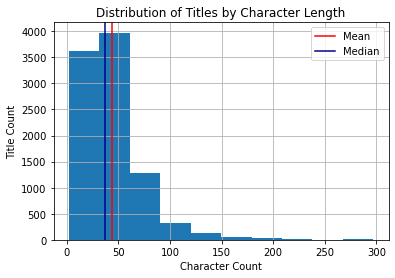

In [35]:
df['title_length'].hist()
plt.title('Distribution of Titles by Character Length')
plt.xlabel('Character Count')
plt.ylabel('Title Count')
plt.axvline(df.title_length.mean(), color='red')
plt.axvline(df.title_length.median(), color='darkblue')
plt.legend(['Mean','Median']);

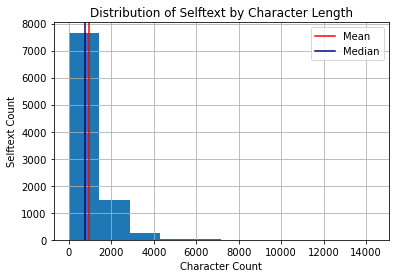

In [36]:
df['selftext_length'].hist()
plt.title('Distribution of Selftext by Character Length')
plt.xlabel('Character Count')
plt.ylabel('Selftext Count')
plt.axvline(df.selftext_length.mean(), color='red')
plt.axvline(df.selftext_length.median(), color='darkblue')
plt.legend(['Mean','Median']);

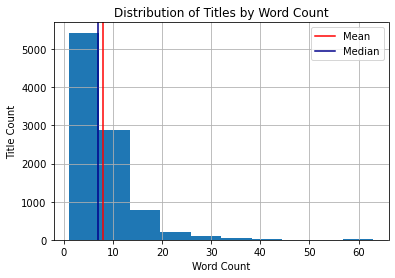

In [37]:
df['title_word_count'].hist()
plt.title('Distribution of Titles by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Title Count')
plt.axvline(df.title_word_count.mean(), color='red')
plt.axvline(df.title_word_count.median(), color='darkblue')
plt.legend(['Mean','Median']);

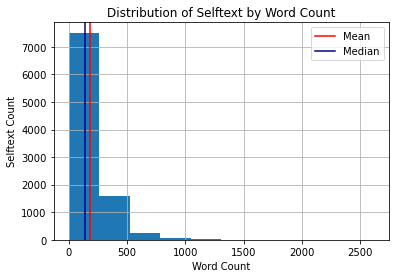

In [38]:
df['selftext_word_count'].hist()
plt.title('Distribution of Selftext by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Selftext Count')
plt.axvline(df.selftext_word_count.mean(), color='red')
plt.axvline(df.selftext_word_count.median(), color='darkblue')
plt.legend(['Mean','Median']);

__EDA Conclusion 1:__ From the above plots and longest/shortest reviews, I don't believe that using the character or word counts for the titles or selftext will provide much distinction between Service Dogs vs. Dog Training. 

I'm considering other ways to look at that....

In [147]:
# subreddit mapping
df['subreddit_num'] = df['subreddit'].map({'service_dogs': 0, 'Dogtraining': 1})

In [148]:
df.tail()

,num_comments,score,selftext,subreddit,title,text,title_length,title_word_count,selftext_length,selftext_word_count,subreddit_num
9431,9,1,Hello all! I've asked you guys questions befor...,service_dogs,Anxiety about Service Dog?,Anxiety about Service Dog ? Hello all ! I 've ...,26,4,1354,264,0
9432,8,1,What was your experience like? Any tips? What ...,service_dogs,College/public access with a service dog,College /public access with a service dog What...,40,6,81,13,0
9433,37,2,Unpopular opinion:\nIt is not okay to sit down...,service_dogs,Unpopular opinion,Unpopular opinion Unpopular opinion : It is no...,17,2,404,84,0
9434,9,1,Right now I’m looking at breeds for a service ...,service_dogs,Sheltie service dog?,Sheltie service dog ? Right now I ’m looking a...,20,3,372,68,0
9435,9,1,Hello! I have a psychological SD and she helps...,service_dogs,Want to teach new tasks,Want to teach new tasks Hello ! I have a psych...,23,5,327,62,0


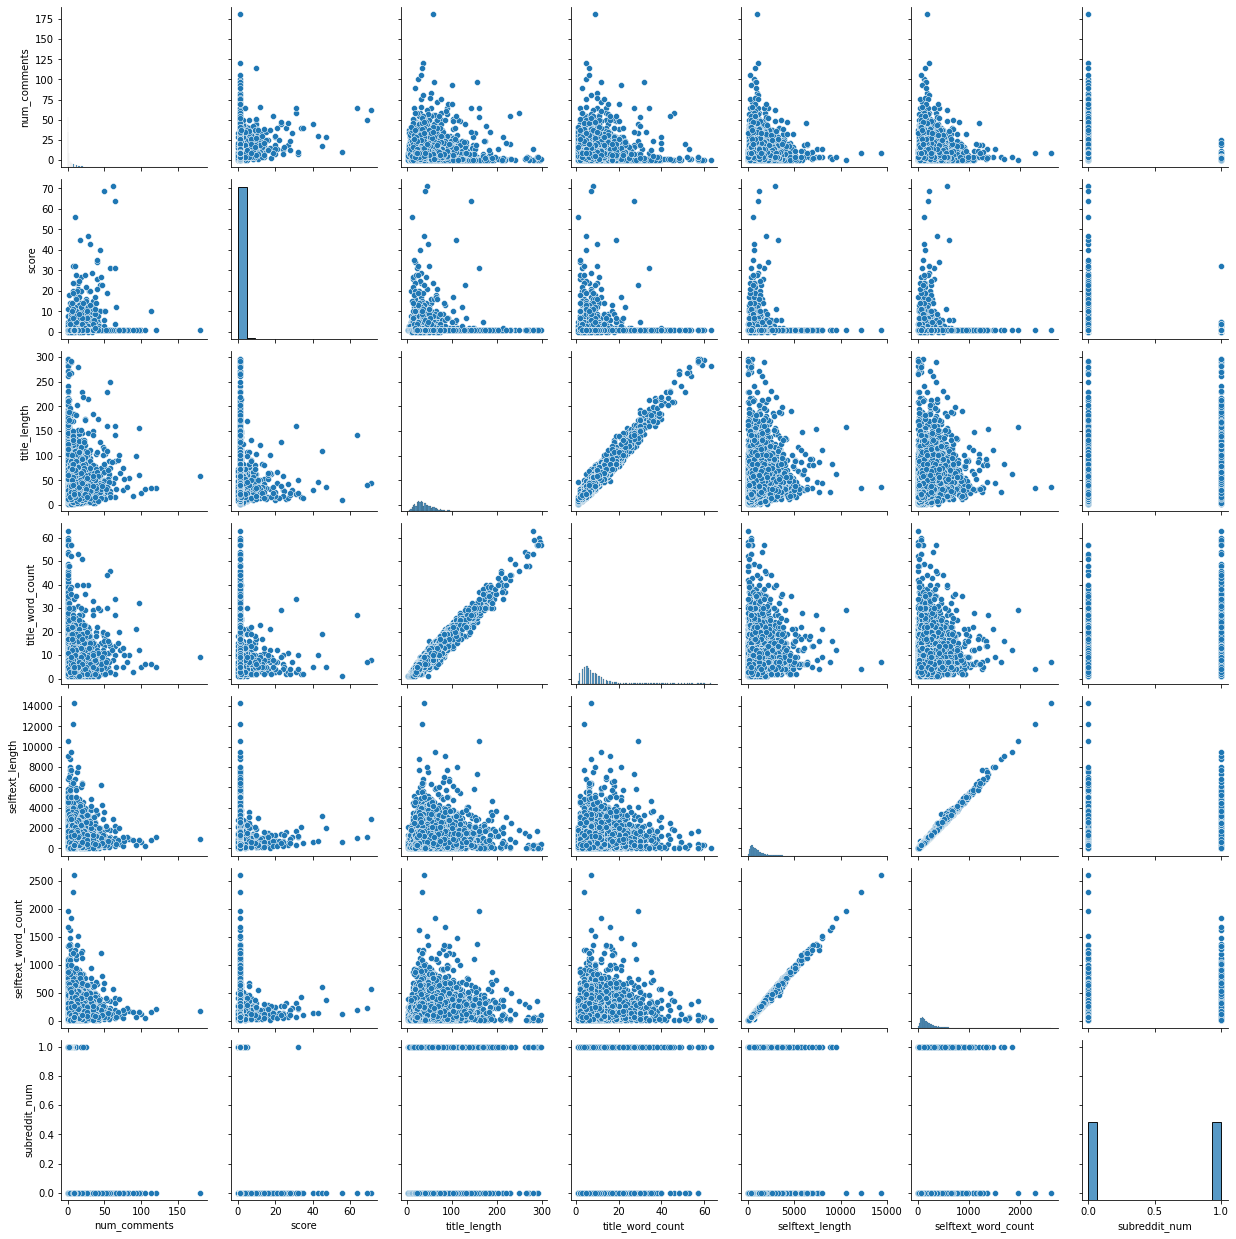

In [41]:
sns.pairplot(df);

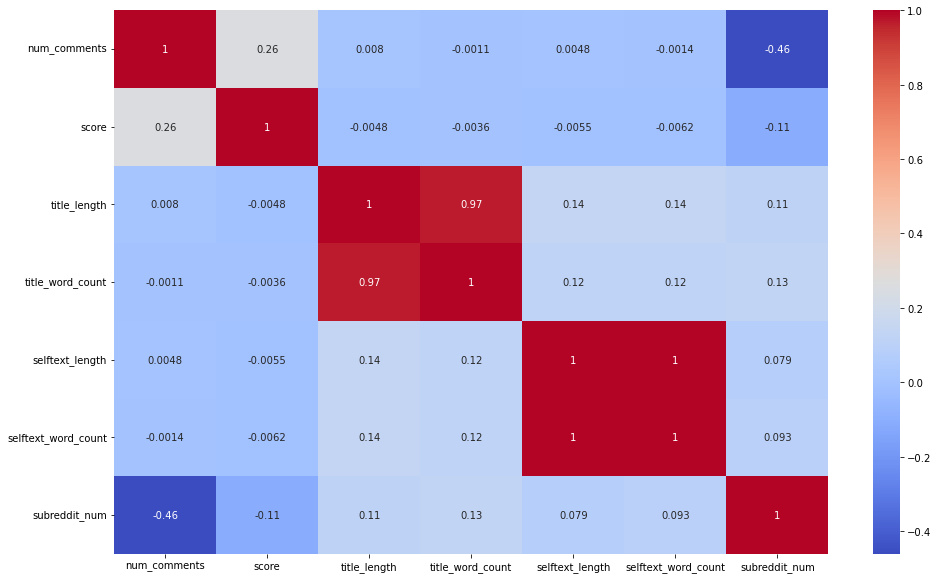

In [42]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm'
    );

In [43]:
df.corr()

,num_comments,score,title_length,title_word_count,selftext_length,selftext_word_count,subreddit_num
num_comments,1.000000,0.255156,0.008017,-0.001076,0.004812,-0.001390,-0.461496
score,0.255156,1.000000,-0.004794,-0.003609,-0.005540,-0.006199,-0.111190
title_length,0.008017,-0.004794,1.000000,0.967318,0.142094,0.140255,0.112805
title_word_count,-0.001076,-0.003609,0.967318,1.000000,0.116408,0.118159,0.127551
selftext_length,0.004812,-0.005540,0.142094,0.116408,1.000000,0.997483,0.079291
selftext_word_count,-0.001390,-0.006199,0.140255,0.118159,0.997483,1.000000,0.092995
subreddit_num,-0.461496,-0.111190,0.112805,0.127551,0.079291,0.092995,1.000000


__EDA Conclusion 2:__ Interesting correlations in the heatmap that show strong relationships between number of comments and ups/scores. But, after talking with Devin about how the data gets saved from Reddit, it might not be smart to spend time working with the num_comments, ups, or scores since they may be outdated. 

## EDA on Word Counts

Utilizing CountVectorizer to count_vectorize the text in title and selftext columns. This converts text data into a structured, numeric dataframe where the *count* is how many times a token is observed, whereas the *vectorizer* is the column that stores those counts. 

In [149]:
cvex = CountVectorizer(stop_words=['do', 'about', 'just', 'has', 'are', 'would', 'any', 'will', 'have', 'had', 'his', 'hers', 'theirs', 'them', 'been', 'a', 'an', 'your', 'as', 'at', 'when', 'where', 'why', 'what', 'her', 'him', 'can', 'get', 'we', 'or', 'so', 'if', 'was', 'me', 'this', 'be', 'the', 'you', 'me', 'to', 'and', 'in', 'on', 'is', 'for', 'how', 'with', 'my', 'he', 'she', 'they', 'it', 'of', 'but', 'that'])

In [150]:
cvex.fit(df['title'])

CountVectorizer(stop_words=['do', 'about', 'just', 'has', 'are', 'would', 'any',
                            'will', 'have', 'had', 'his', 'hers', 'theirs',
                            'them', 'been', 'a', 'an', 'your', 'as', 'at',
                            'when', 'where', 'why', 'what', 'her', 'him', 'can',
                            'get', 'we', 'or', ...])

In [152]:
# title 
c_title = cvex.transform(df['title'])
c_title
c_title = pd.DataFrame(c_title.todense(), columns=cvex.get_feature_names_out())
c_title

,00,000,10,100,10lbs,10m,10mo,10yr,11,11mo,11year,12,12wk,13,13lb,13yo,13yrs,14,14th,15,150lb,16,17,18,180,19,19yo,1st,1y,1yo,1yr,20,200,2020,2022,2097,21,21m,22,23lb,24,24f,26th,28,2am,2f,2mo,2nd,2x,2y,2yo,2yr,30,35lbs,3h,3mo,3rd,3y,3yo,3yr,4am,4h,4mo,4month,4th,4y,4yo,4yom,4yr,50,500,50lbs,5am,5lb,5mo,5mtrs,5yo,5yr,6m,6mo,6yo,75lb,7f,7ft,7mo,7mon,7month,7mos,7th,7yo,80,80lb,8mo,8month,8mths,8yo,90,99,9mo,aa,abandoning,abelism,abhors,ability,able,abled,ableds,ableist,abnormal,above,absence,absolute,absolutely,abt,abuse,abused,abusive,academy,acana,accept,acceptable,acceptance,accepted,accepting,access,accessibility,accessible,accessories,accident,accidental,accidentally,accidents,acclimating,accommodate,accommodating,accommodation,accommodations,accompany,accomplish,account,accountability,accredited,accuracy,accuses,acd,acquainting,acquired,acquisition,across,acsess,act,acting,action,activated,active,actively,activities,activity,acts,actual,actually,ad,ada,adapted,added,addicted,adding,addisons,addition,additional,address,addressing,adhd,adi,adjust,adjusting,admitted,adolescence,adolescent,adopt,adopted,adoptee,adopting,adoption,adorable,adrenaline,ads,adult,adulthood,adults,advance,advantages,adversion,advertised,advice,advise,advised,advocating,aer,affect,affected,affecting,affection,affectionate,affects,afford,affordable,affording,afraid,after,aftercare,afternoon,aftershock,afterward,afterwards,again,against,age,agency,agents,aggresive,aggression,aggressive,aggressively,aggressiveness,aggressivity,agility,aging,agitated,ago,agoraphobia,agoraphobic,agree,agrees,agresser,agressif,agression,agressive,agricultural,ah,ahead,aid,aids,ailments,aim,air,airbnb,airedale,airfrance,airline,airlines,airplane,airplanes,airport,airports,airshow,airtravel,airways,aisle,aita,aka,akc,akita,akitas,alarm,alarms,alaska,alaskan,alberta,alert,alerted,alerting,alerts,alexa,alive,all,allegation,allegiant,allergen,allergenic,allergens,allergic,allergies,allergy,allow,allowed,allowing,allows,alls,almost,alone,along,alpha,already,alright,also,alter,altercations,altering,alternative,alternatives,always,am,ama,amazement,amazing,amazon,america,american,among,amount,amp,amputee,amtrack,amtrak,amused,amusement,anal,analysis,anchors,anemia,angel,angels,anger,angry,animal,animals,aninals,announce,announced,annoyed,annoying,anorexia,another,answer,answers,antagonizing,anti,anticipating,anticipation,antler,anxieties,anxiety,anxioud,anxious,anybody,anymore,anyone,anything,anytime,anyway,anywhere,apart,apartment,apartments,apbt,ape,apecific,apologies,apologize,app,apparent,apparently,appeal,appealing,appears,appeasement,apple,applicant,application,applied,apply,applying,appointment,appreciate,appreciated,approach,approached,approaching,appropriate,appropriately,approval,approve,approved,apps,april,apt,apts,aquarium,aquire,area,areas,aren,arena,argentino,arguing,argument,arizona,arm,arms,army,around,arousal,arrangements,arrested,arrive,arriving,arseholes,arthritis,artificial,artist,asap,asd,ashkii,aside,ask,asked,asking,asks,asleep,aspergers,ass,assert,assertive,assess,assessment,asshole,assimilating,assist,assistance,assistant,assisting,associate,associates,association,asthma,ate,atlanta,atlantic,attach,attachable,attached,attachment,attack,attacked,attacking,attacks,attempting,attempts,attend,attention,attestation,attire,attitude,attracts,attrition,audio,august,aunt,aus,aussidor,aussie,aussies,australia,australian,autism,autisms,autistic,auto,automated,automatic,autonomic,autophobia,available,avenue,average,aversion,aversive,aversives,avoid,avoidance,avoiding,avoids,awake,aware,awareness,away,awesome,awkward,aww,axiety,az,babies,baby,back,backchatting,background,backlash,backpack,...,traumatized,travel,traveled,traveling,travelled,travelling,travels,treadmill,treadmills,treasure,treat,treating,treatment,treats,trees,tremendously,trends,trial,trials,trichotillomania,trick,tricks,tricolor,tried,tries,trig,trigger,triggered,triggers,trimmer,trimming,trip,tripawd,

In [153]:
cvex.fit(df['selftext'])

CountVectorizer(stop_words=['do', 'about', 'just', 'has', 'are', 'would', 'any',
                            'will', 'have', 'had', 'his', 'hers', 'theirs',
                            'them', 'been', 'a', 'an', 'your', 'as', 'at',
                            'when', 'where', 'why', 'what', 'her', 'him', 'can',
                            'get', 'we', 'or', ...])

In [114]:
# selftext
c_selftext = cvex.transform(df['selftext'])
c_selftext
c_selftext = pd.DataFrame(c_selftext.todense(), columns=cvex.get_feature_names_out())
c_selftext

,00,000,00919633933361,00am,00pm,01,05,0530,060,0600,07,0700,0830,0900,0_o,0f,10,100,1000,10000,1000000000,100f,100lb,100lbs,100m,100mg,100s,100x,101,1030,104,105,1052,105lbs,108,10am,10f,10ft,10hr,10hrs,10ish,10k,10lb,10lbs,10m,10meters,10mg,10mi,10min,10mins,10mo,10month,10months,10mos,10pm,10s,10seconds,10th,10x,10yo,11,110,1100,110bpm,110lb,110lbs,112,115lbs,11am,11lbs,11mo,11months,11pm,11th,11year,11years,11yo,11yr,12,120,1200,12000,120lbs,120s,122,1230,1230pm,125,125lbs,127,12am,12hr,12hrs,12ish,12k,12lb,12lbs,12m,12mo,12month,12oz,12pm,12th,12wks,12wo,13,130,1300,130ish,130lb,135,135ish,13k,13lb,13m,13th,13wk,13wks,13yo,13yrs,14,1400,140lb,140lbs,1430,148,14ish,14mo,14month,14months,14mos,14th,14w,14wk,14wks,14yrs,15,150,1500,15000,150ib,150ish,150lb,150lbs,150pounds,155,15f,15k,15kg,15lb,15lbs,15m,15min,15minutes,15mo,15month,15pm,15th,15w,15x,15yr,16,160,1600,1630,16ish,16kg,16lbs,16m,16mo,16th,16wk,16wks,16y,17,170lbs,175,17f,17kg,17lb,17lbs,17mo,17yo,18,180,1800,185lbs,189,1890,18f,18hrs,18in,18ish,18kg,18lbs,18m,18mo,18months,18th,19,1900,1973,1974,19f,19k,19mo,1am,1b,1ba,1bd,1c,1cup,1h,1hour,1hr,1hr30m,1ish,1k,1l,1lb,1m,1mm,1mo,1on1,1pm,1st,1week,1x,1y,1y3m,1y4m,1y8m,1year,1years,1yo,1yr,1yro,1⅓year,20,200,2000,2003,200lb,200mg,200yards,2010,2010s,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,20cm,20f,20ft,20ish,20k,20kg,20lb,20lbs,20m,20mg,20min,20minutes,20mo,20oz,20ppm,20s,20th,20x,20x40,21,212,2130,21lb,22,220lbs,22f,22lbs,22nd,23,230am,230pm,23f,23rd,23y,24,240,24f,24hr,24m,25,250,2500,25f,25feet,25ish,25k,25kg,25lb,25lbs,25m,25mins,25nb,25th,26,26f,26lbs,26m,26th,27,27f,27lb,27th,28,2800,29,2987,29f,29th,2am,2ba,2bd,2c,2cm,2days,2f,2h,2hounds,2hours,2hrs,2in,2ish,2k,2m,2min,2mo,2month,2mos,2nd,2play,2pm,2x,2x5,2xs,2y,2yo,2yom,2yr,2yrs,30,300,3000,3000ish,300lbs,308,30am,30f,30ft,30inches,30k,30kg,30lb,30lbs,30m,30min,30mins,30minute,30pm,30s,30seconds,30th,30x,31,31m,32,320,32f,32m,32oz,33,33lb,34,348,34lb,35,350,3500,35kg,35lb,35lbs,36,360,365,36yo,37,37lb,37lbs,38,38ish,3am,3d,3f,3ft,3h,3hours,3hr,3hrs,3ish,3k,3labs,3lb,3m,3mo,3month,3months,3pm,3rd,3x,3x5,3y,3year,3yo,3yr,3yrold,3yrs,40,400,4000,40ish,40k,40kg,40lb,40lbs,40min,40mins,40s,40some,41,418,42,42lb,42lbs,430,43lb,44kg,45,450,45am,45lb,45lbs,45min,45mins,46,47f,47lbs,48,480,484,48hrs,48m3,49,4am,4c,4days,4dx,4f,4ft,4h,4hours,4hrs,4ish,4k,4lb,4lbs,4m,4min,4mins,4mo,4months,4monthsold,4oz,4pm,4th,4ths,4x,4y,4yo,4yr,4yrs,50,500,5000,...,whirlwind,whisper,whisperer,whispering,whist,whistle,whistled,whistles,whistling,white,whites,whitest,whits,who,whoa,whoever,whoknows,whole,wholeheartedly,wholesome,wholly,whom,whomever,whooping,whoops,whopping,whore,whos,whose,whyyyyyy,wi,wich,wichita,wicker,wide,widely,widen,wider,widow,width,wiener,wierd,wife,wifi,wig,wiggle,wiggles,wiggling,wiggly,wiglo,wigs,wiki,wil,wilco,wild,wilderness,wildest,wildfire,wildlife,wildly,wildness,willbe,willed,willful,willing,willingly,willingness,willington,willow,willpower,wills,willy,wilmington,wimp,wimper,win,wince,winced,wind,winded,windiness,winding,window,windows,windowsill,windpipe,winds,windshield,windsor,windy,wine,winehouse,wines,wing,wini,wining,winner,winnie,winning,wins,winston,winter,winters,wipe,wiped,wipers,wipes,wiping,wips,wire,wired,wiredog,wirehaired,wireless,wires,wiring,wiry,wisconsin,wisdom,wise,wisely,wish,wished,wishes,wishful,wishing,wit,witch,witching,withdrawal,withdrawals,withdrawing,withdrawl,withdraws,withering,withhim,withhold,withholding,within,withing,without,witht,witness,witnessed,witnesses,witnessing,wits,witt,witten,witts,wives,wk,wks,wl,wlel,wo,woah,wobble,wobbler,wobblies,wobbly,woc,wodnerful,woefully,woes,woke,woken,wolf,wolfdog,wolfhound,wolfhounds,wolfs,wolves,woman,women,won,wonder,wondered,wonderful,wonderfully,wondering,wonders,wonky,wont,woo,wood,wooded,wooden,woods,woodworking,woody,woof,woofs,woohoo,wooing,woot,word,worded,wording,wordings,words,wordy,wore,work,workability,workable,workaround,workday,workdays,worked,wor

### The 15 most common words

Will show common words for both Title and Selftext. Removing stopwords because the original set of 15 were primarily stop words. 

In [154]:
# title: 15 common words
c_title.sum().sort_values(ascending=False).head(15)

dog         3785
service     1309
training     943
help         719
dogs         697
puppy        640
old          426
sd           397
advice       390
not          341
need         332
esa          292
new          287
train        261
stop         247
dtype: int64

In [155]:
# selftext: 15 common words
c_selftext.sum().sort_values(ascending=False).head(15)

dog         19898
not          9826
out          6707
dogs         6596
like         6154
service      5949
ve           5902
up           5597
training     5440
from         5238
all          5202
other        5109
know         5048
time         4861
don          4763
dtype: int64

### Frequency of the 15 most common words as bar chart


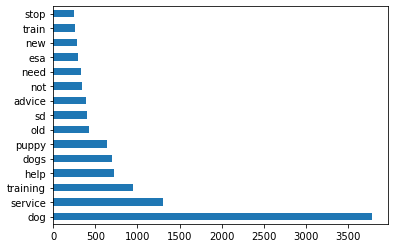

In [156]:
# title: frequency bar chart
c_title.sum().sort_values(ascending=False).head(15).plot(kind='barh');

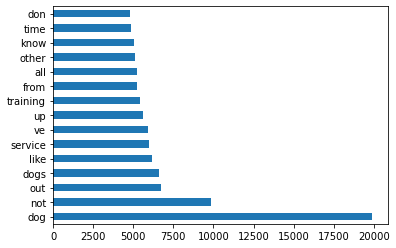

In [157]:
# selftext: frequency bar chart
c_selftext.sum().sort_values(ascending=False).head(15).plot(kind='barh');

In [120]:
# investigating 'don'
#[selftext for selftext in df['selftext'] if 'don' in selftext.lower()][:10]
# viewed the top ten for the word 'don', but I think it is pulling into the most frequently used because of the contraction "don't"

In [158]:
c = pd.DataFrame()

p = df.groupby(df['subreddit_num']).mean()[['title_length', 'title_word_count']]
q = df.groupby(df['subreddit_num']).mean()[['selftext_length', 'selftext_word_count']]
print(p)
print()
print(q)

               title_length  title_word_count
subreddit_num                                
0                 40.578490          7.252652
1                 47.128971          8.714316

               selftext_length  selftext_word_count
subreddit_num                                      
0                   901.054094           169.487272
1                  1034.686573           199.077933


__EDA Conclusion 3__ The Dog Training Subreddit has more text in both the title and selftext areas compared to the Service Dogs Subreddit. This makes sense because the Dog Training text has a slightly higher number of observations.

### Tokenizing, Lemmatizing/Stemming, and removing special characters as preprocessing.

In [159]:
# lemmatizer/stemmer

port_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [160]:
# tokenizing for lemmatizing/stemming
tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
df['text'] = df['text'].transform(tokenizer.tokenize)

# lemmatizing/stemming
for list in df['text']:
    [port_stemmer.stem(x) for x in list]
    [lemmatizer.lemmatize(x) for x in list]

# joining lists back together
df['text'] = df['text'].map(lambda x: ' '.join(x))

In [161]:
# Character removal:

# remove "&amp;" as result of ampersand
df['text'] = df['text'].map(lambda x: x.replace('&amp;', ''))

# remove "**"
df['text'] = df['text'].map(lambda x: x.replace('**', ''))

# remove "*"
df['text'] = df['text'].map(lambda x: x.replace('*', ''))

# remove \n breaks
df['text'] = df['text'].map(lambda x: x.replace('\n', ' '))

In [162]:
df.head()

,num_comments,score,selftext,subreddit,title,text,title_length,title_word_count,selftext_length,selftext_word_count,subreddit_num
0,2,1,The wife and I adopted a 1 to 3 year old beagl...,Dogtraining,Rescue dog will not come inside from fenced in...,Rescue dog will not come inside from fenced in...,51,10,986,203,1
1,1,1,I have an 8 month old Rottweiler puppy who is ...,Dogtraining,“Drop it” fails,“Drop it ” fails I have an 8 month old Rottwei...,15,3,1056,207,1
2,1,1,Long story short we used to have two dogs. A d...,Dogtraining,My dog will ONLY submissive pee.,My dog will ONLY submissive pee . Long story s...,32,6,732,147,1
3,1,1,I’ve recently adopted a golden retriever! He’s...,Dogtraining,Separation anxiety in dog used to living in a ...,Separation anxiety in dog used to living in a ...,51,10,573,112,1
4,1,1,**TLDR:** Do you leave your dog unsupervised ...,Dogtraining,"So, is my backyard making my dog more reactive?","So , is my backyard making my dog more reactiv...",47,9,1866,330,1


In [163]:
# save as .csv for use in modeling
df.to_csv('../data/prepped.csv', index=False)

In [164]:
# BASELINE
df['subreddit_num'].mean()

0.5004239084357779